## KNN Model Tuning

- Bank Customer Churn Data


In [15]:
from __future__ import print_function

In [16]:
# read in the iris data
#from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd

In [17]:
churn = pd.read_csv('bankchurnFeatureEngine.csv')
churn.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,CreditScoreTable_1,CreditScoreTable_2,CreditScoreTable_3,CreditScoreTable_4
0,42,2,0.00,1,1,1,101348.88,1,0,0,0,1,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,0,0
2,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,1,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0,0,0,1


In [18]:
churn.columns

Index(['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain', 'CreditScoreTable_1',
       'CreditScoreTable_2', 'CreditScoreTable_3', 'CreditScoreTable_4'],
      dtype='object')

In [19]:
# create X (features) and y (response)
X = churn.drop('Exited',axis=1)
y = churn.Exited

## Model evaluation procedures

**Motivation:** Need a way to choose between machine learning models

- Goal is to estimate likely performance of a model on **out-of-sample data**

## Evaluation procedure #1: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

In [20]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(10000, 14)
(10000,)


In [21]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [22]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(6000, 14)
(4000, 14)


In [23]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(6000,)
(4000,)


In [24]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred, average='weighted'))


0.7126625818186646


However, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy

## Evaluation procedure #2: Cross Validation

Steps for cross-validation:

- Dataset is split into K "folds" of **equal size**
- Each fold acts as the **testing set** 1 time, and acts as the **training set** K-1 times
- **Average testing performance** is used as the estimate of out-of-sample performance

Benefits of cross-validation:

- More **reliable** estimate of out-of-sample performance than train/test split
- Can be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**

Drawbacks of cross-validation:

- Can be computationally **expensive**

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

## Cross-validation example: parameter tuning

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='f1_weighted')

print(scores)

[0.71124794 0.72461512 0.69799274 0.72039563 0.72229636 0.71366427
 0.71063007 0.7089618  0.73258169 0.71264065]


In [27]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7155026271438686


In [28]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='f1_weighted')
    k_scores.append(scores.mean())
print(k_scores)

[0.6831227559989694, 0.7114659630613471, 0.7053655897316665, 0.7131516567495819, 0.7155026271438686, 0.7155071081905282, 0.7177557607709788, 0.7111469805111588, 0.7146050943840374, 0.7123669791261819, 0.7139070359554341, 0.7104462009667191, 0.7109398659865451, 0.709136891692996, 0.7092582890018436, 0.7078707355142422, 0.7094037849504093, 0.7087220905305001, 0.7101780042402399, 0.7093360076201066, 0.7095736465928162, 0.7081067167682804, 0.7085546258023505, 0.70760261727072, 0.7082112126035663, 0.7072798718478233, 0.7070792640340728, 0.7066645330200397, 0.7071800897493784, 0.7060900673689497]


Text(0, 0.5, 'Cross-Validated f1_Weighted')

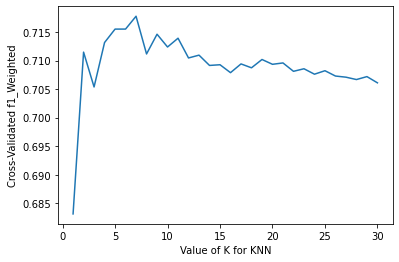

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated f1_Weighted')

## Improvements to cross-validation

**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**


## More efficient parameter tuning using `GridSearchCV`

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# define the parameter values that should be searched
k_range = list(range(1, 100))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [32]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [33]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_weighted')

In [34]:
# fit the grid with data
grid.fit(X, y);

In [35]:
# view the complete results
grid.cv_results_

{'mean_fit_time': array([0.00871861, 0.0073278 , 0.00734479, 0.0072619 , 0.00727856,
        0.0073468 , 0.00732596, 0.00727646, 0.00727649, 0.00738394,
        0.00743268, 0.00734618, 0.00731461, 0.00731187, 0.00726817,
        0.00727773, 0.00728447, 0.00729549, 0.00727799, 0.00727358,
        0.00730956, 0.00727549, 0.00727155, 0.00733211, 0.00729434,
        0.00727954, 0.00727808, 0.00730062, 0.00727696, 0.00727386,
        0.00728722, 0.00728137, 0.00727456, 0.00727329, 0.00730379,
        0.00727704, 0.00728331, 0.00738306, 0.00729928, 0.0072865 ,
        0.00729725, 0.00728819, 0.00728636, 0.00736618, 0.00730913,
        0.00730264, 0.00730262, 0.0073086 , 0.00731497, 0.00729251,
        0.00732236, 0.00732379, 0.0072861 , 0.00730307, 0.00729277,
        0.00729148, 0.00731277, 0.00730743, 0.00730004, 0.00733931,
        0.00729983, 0.00730066, 0.00738857, 0.00730734, 0.00731075,
        0.00735707, 0.00731637, 0.00729599, 0.00738335, 0.00731108,
        0.00729697, 0.00733759,

In [36]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 7}
Best estimator:  KNeighborsClassifier(n_neighbors=7)
Best score:  0.7177557607709788


## Searching multiple parameters simultaneously

In [37]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [38]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [39]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_weighted')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [40]:
# examine the best model -- still 13 neighbors and uniform weights
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 7, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=7)
Best score:  0.7177557607709788


## Using the best parameters to make predictions

In [27]:
X_test.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,CreditScoreTable_1,CreditScoreTable_2,CreditScoreTable_3,CreditScoreTable_4
6252,32,3,96709.07,2,0,0,41788.37,1,1,0,1,0,0,0
4684,43,1,0.00,2,1,1,146379.30,1,0,0,1,0,0,0
1731,44,4,0.00,2,1,0,58561.31,0,0,1,1,0,0,0
4742,59,8,119152.10,2,1,1,170679.74,1,1,0,0,0,0,0
4521,27,7,124995.98,1,1,1,114669.79,0,0,1,0,0,0,0


In [41]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[600, 68, 4, 45650.00,12,1,58000,0,0,0,1,1,0,0]])

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [32]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[600, 68, 4, 45650.00,12,1,58000,0,0,0,1,0,1,0]])

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])